In [1]:
using Optim, NLsolve, Distributions, ForwardDiff, QuadGK,Plots, LaTeXStrings

In [2]:
#first attempt, Uniform cdf.
F(x) = cdf(Uniform(0,1),x)

F (generic function with 1 method)

In [3]:
f(x) = ForwardDiff.derivative(F,x)

f (generic function with 1 method)

The equations below is copied from Professor Peters' github notebooks. They refers to the necessary first order conditions for $(r,t,v_{min}, v_{max})$ to be a optimal auction; That is, maximises the optimal revenue for the auctioneer. 

In [4]:
eq1(alpha,t,v_min, v_max) = alpha * (t*(1-F(t))-(v_max - (1-F(v_max))/f(v_max))) -
(1-alpha)*
(
(v_min-t)*
((v_max - (1-F(v_max))/f(v_max))-(v_min - (1-F(v_min))/f(v_min)))*
f(v_min)+
(F(v_max)-F(v_min))*
((v_max - (1-F(v_max))/f(v_max))
-((1-F(v_min))*v_min-(1-F(v_max))*v_max))
)

eq1 (generic function with 1 method)

In [5]:
phidiff(v_max,v_min) = ((v_max - (1-F(v_max))/f(v_max))-(v_min - (1-F(v_min))/f(v_min)))

eq2(alpha, t, v_min, v_max) = -alpha*(-f(t)*t+(1-F(t))) -
(1-alpha)*phidiff(v_max,v_min)*f(v_min)

eq2 (generic function with 1 method)

In [6]:
eq3(r,v_min,v_max)= -(r - (1-F(r))/f(r))*f(r) - phidiff(v_max,v_min)*f(v_min)

eq3 (generic function with 1 method)

In [7]:
Fp(s)= F(s)^(n-1)
eq4(alpha, r, t, v_min, v_max) = (1-alpha)^(n-1) * quadgk(Fp,r,v_min)[1] -
(
  (
    (((1-alpha)*F(v_max)+alpha)^n)-(((1-alpha)*F(v_min))^n)
  ) /
  (
    (n*((1-alpha)*(F(v_max)-F(v_min))+alpha))
  )
)*(v_min-t)

eq4 (generic function with 1 method)

In [8]:
#we try to minimise the distance between the vector of the equations to the vector [0,0,0,0]
object(x,y) = sum([(x[i] - y[i] )^2 for i = 1:maximum(size(x))])

#vector of equations must equal zero (ideally), 
adheqvec(alpha, r, t, v_min, v_max) = [eq1(alpha, t, v_min, v_max) eq2(alpha, t, v_min, v_max) eq3(r,v_min,v_max) eq4(alpha, r, t, v_min, v_max)]




adheqvec (generic function with 1 method)

In [9]:
n = 10
z = 2000

res = optimize(b -> object(adheqvec(0.8, b[1], b[2], b[3], b[4]), [0 0 0 0]), [0.1;0.1;0.1;0.1])

 * Status: success

 * Candidate solution
    Final objective value:     5.336325e-09

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    192
    f(x) calls:    331


In [10]:
vec = Optim.minimizer(res)

4-element Vector{Float64}:
 0.4029213477903292
 0.5242933561572675
 0.5248404792196251
 0.6219352704375578

In [11]:
#try with Truncated Normal 
F(x) = cdf(Truncated(Normal(0.5,1),0,1),x)
f(x) = ForwardDiff.derivative(F,x)
res = optimize(b -> object(adheqvec(0.8, b[1], b[2], b[3], b[4]), [0 0 0 0]), [0;0.1;0.3;0.5])

 * Status: success

 * Candidate solution
    Final objective value:     4.039636e-09

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    193
    f(x) calls:    337


In [12]:
vec_2 = Optim.minimizer(res)

4-element Vector{Float64}:
 0.39356792217165465
 0.5143489929166771
 0.5144273414962452
 0.6131041970068729

In [13]:
res = optimize(b -> object(adheqvec(0.9, b[1], b[2], b[3], b[4]), [0 0 0 0]), [0.2;0.0;0.0;0.0])


 * Status: success

 * Candidate solution
    Final objective value:     6.532351e-01

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    401
    f(x) calls:    709


As this function might have multiple stationary points, the optimization algorithm might converge to different points depending on initial values provided to the optimizer, so in a sense to get the true global minimum we would need to do a grid search of initial values, in the parameter space $[0,1] \times [0,1] \times [0,1] \times [0,1]$.
Below we do a grid search with width 0.1 (finer grid would take ~10 min to generate on my laptop)

In [14]:
makes_sense(b)= 0 <= b[1] <= b[2]<=b[3]<=b[4]


makes_sense (generic function with 1 method)

In [15]:
grid_initial_raw = [[i;j;k;l] for i = 0:0.1:1 for j = 0:0.1:1 for k = 0:0.1:1 for l = 0:0.1:1]
grid_initial = filter((x) -> makes_sense(x),grid_initial_raw)

1001-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.1]
 [0.0, 0.0, 0.0, 0.2]
 [0.0, 0.0, 0.0, 0.3]
 [0.0, 0.0, 0.0, 0.4]
 [0.0, 0.0, 0.0, 0.5]
 [0.0, 0.0, 0.0, 0.6]
 [0.0, 0.0, 0.0, 0.7]
 [0.0, 0.0, 0.0, 0.8]
 [0.0, 0.0, 0.0, 0.9]
 [0.0, 0.0, 0.0, 1.0]
 [0.0, 0.0, 0.1, 0.1]
 [0.0, 0.0, 0.1, 0.2]
 ⋮
 [0.8, 0.8, 0.9, 0.9]
 [0.8, 0.8, 0.9, 1.0]
 [0.8, 0.8, 1.0, 1.0]
 [0.8, 0.9, 0.9, 0.9]
 [0.8, 0.9, 0.9, 1.0]
 [0.8, 0.9, 1.0, 1.0]
 [0.8, 1.0, 1.0, 1.0]
 [0.9, 0.9, 0.9, 0.9]
 [0.9, 0.9, 0.9, 1.0]
 [0.9, 0.9, 1.0, 1.0]
 [0.9, 1.0, 1.0, 1.0]
 [1.0, 1.0, 1.0, 1.0]

In [16]:
g(alpha,initial) = optimize(b -> object(adheqvec(alpha, b[1], b[2], b[3], b[4]), [0 0 0 0]), initial)

g (generic function with 1 method)

In [17]:
function sol_set(alpha)
    #make optimizer block
    optimizer_raw = [g(alpha, grid_initial[i]) for i = 1:maximum(size(grid_initial))]
    #delete non-convergent
    optimizer_filtered = filter((x) -> Optim.converged(x) == true, optimizer_raw)
    #make the block of minimizer
    minimizer = [Optim.minimizer(optimizer_filtered[i]) for i = 1:maximum(size(optimizer_filtered))]
    #sanity check on the minimizers
    minimizer_san_checked = filter((x) -> makes_sense(x) == true, minimizer)
    return(setdiff(minimizer_san_checked, grid_initial))
end
        

sol_set (generic function with 1 method)

In [18]:
#sorted in ascending order
ss1 = sort(sol_set(0.8))

315-element Vector{Vector{Float64}}:
 [0.3934821054871428, 0.5143448280305885, 0.5143491064220249, 0.6131005733322645]
 [0.39350937693278865, 0.5143406859778985, 0.514376906970218, 0.6131031015113423]
 [0.39352622635277346, 0.5143132519015085, 0.5143729735522261, 0.6130941223496322]
 [0.39352710966759813, 0.5143287312201792, 0.5143629276532184, 0.6130962036008514]
 [0.39352789424651924, 0.514336444649264, 0.5143915870691882, 0.6131348375645937]
 [0.3935282701784312, 0.5143568776711611, 0.5143917240088224, 0.6131186939103075]
 [0.3935355526573586, 0.5143147071039652, 0.5143777971596543, 0.6130842089834108]
 [0.3935427706754065, 0.5142537297783989, 0.514370172678434, 0.6130564537883509]
 [0.39354680466216857, 0.5143367520422999, 0.5143598703112964, 0.6130578209762587]
 [0.39355404109131387, 0.5142991904358521, 0.5143930924398511, 0.6130638211274114]
 [0.39356138522173595, 0.5143432669238146, 0.5144147339847056, 0.6130869879338893]
 [0.39356169985955747, 0.5143575992339062, 0.514392392013

The above are possible candidates which non-trivially satisfy the four first order conditions.  We can further filter these solutions by finding out which one would produce the most revenue for the sellor.

In [19]:
Q1(v_min,v_max,n,alpha)=(((1-alpha)*F(v_max)+alpha)^n -((1-alpha)*F(v_min))^n)/(n*(((1-alpha)*(F(v_max)-F(v_min)))+alpha))


Q1 (generic function with 1 method)

In [20]:
pi_uniformed(x) = n*alpha*(1 - F(x))*x 


pi_uniformed (generic function with 1 method)

In [21]:
#find out the maximizer(s) of a function in a set
function max_return(f,set)
    optimum_auc = []
    maximum_rev = maximum([f(set[i]) for i = 1:maximum(size(set))])
    for i in 1:maximum(size(set))
        if f(set[i]) == maximum_rev
            push!(optimum_auc, set[i])
        end
    end
    return(optimum_auc, maximum_rev)
end

    
    
    
        

max_return (generic function with 1 method)

In [22]:
Q_eps(alpha,v_min,v_max) = (((1 - alpha)*F(v_min) + alpha)^n - ((1 - alpha)*F(v_min))^n)/(n*((1 - alpha)*(F(v_max) - F(v_min)) + alpha ))
phi(v) = v - (1 - F(v))/f(v)
rev_int(x) = phi(x) * f(x)
Revenue(alpha,r,t,v_min,v_max) = n*(1-alpha)*Q_eps(alpha,v_min,v_max)*quadgk(rev_int,r,1)[1] + n*alpha*Q_eps(alpha,v_min,v_max)* quadgk(rev_int,r,1)[1]*t*(1-F(t))




Revenue (generic function with 1 method)

In [23]:
Revenue_prob(alpha,auc) = Revenue(alpha, auc[1], auc[2], auc[3], auc[4])
Revenue_1(auc) = Revenue_prob(0.8,auc)
max_return(Revenue_1,ss1)

(Any[[0.4881278348061677, 0.4905886834264145, 0.6141618064694857, 0.6161294549097991]], 0.05655013553283583)

In the code above what we have really done is we tried to produce algorithms to produce candidate solutions for optimal mechanisms. However, we assumed that the uninformed bidders will drop from the bid if they are uninterested. We could modify this by introducing a threshold strategy. 

In [24]:
eq1_new(alpha, xi, t, v_min, v_max) = alpha * (t*(1-F(t))-(1-F(xi))*phi(v_max)) -
(1-alpha)*
(
(v_min-t)*
((v_max - (1-F(v_max))/f(v_max))-(v_min - (1-F(v_min))/f(v_min)))*
f(v_min)+
(F(v_max)-F(v_min))*
((v_max - (1-F(v_max))/f(v_max))
-((1-F(v_min))*v_min-(1-F(v_max))*v_max))
)

eq1_new (generic function with 1 method)

In [25]:
Qeps2(xi,v_min,v_max,alpha)=(((1-alpha)*F(v_max)+alpha)^n -((1-alpha)*F(v_min)+ alpha*F(xi))^n)/(n*(((1-alpha)*(F(v_max)-F(v_min))) + alpha * (1-F(xi))))


Qeps2 (generic function with 1 method)

In [26]:
eq4_new(alpha,xi,r,t,v_min,v_max) = (1-alpha)^(n-1) * quadgk(Fp,r,v_min)[1] + (alpha*F(xi))^(n-1) - Qeps2(xi,v_min,v_max,alpha)*(v_min-t)
adheqvec(alpha, xi, r, t, v_min, v_max) = [eq1_new(alpha, xi, t, v_min, v_max)  eq2(alpha, t, v_min, v_max) eq3(r,v_min,v_max) eq4_new(alpha, xi, r, t, v_min, v_max)]


adheqvec (generic function with 2 methods)

In [27]:
g(alpha,xi,initial) = optimize(b -> object(adheqvec(alpha,xi, b[1], b[2], b[3], b[4]), [0 0 0 0]), initial)

g (generic function with 2 methods)

In [28]:
function sol_set(alpha,xi)
    #make optimizer block
    optimizer_raw = [g(alpha,xi,grid_initial[i]) for i = 1:maximum(size(grid_initial))]
    #delete non-convergent
    optimizer_filtered = filter((x) -> Optim.converged(x) == true, optimizer_raw)
    #make the block of minimizer
    minimizer = [Optim.minimizer(optimizer_filtered[i]) for i = 1:maximum(size(optimizer_filtered))]
    #sanity check on the minimizers
    minimizer_san_checked = filter((x) -> makes_sense(x) == true, minimizer)
    return(setdiff(minimizer_san_checked, grid_initial))
end

sol_set (generic function with 2 methods)

In [29]:
ss2 = sort(sol_set(0.8,0.2))

338-element Vector{Vector{Float64}}:
 [0.3721846780441704, 0.5197442812287583, 0.5197507640471748, 0.6407307212739005]
 [0.37220283213185956, 0.519774108454884, 0.5198197245848429, 0.6408060077698876]
 [0.372206610425034, 0.5197586674223269, 0.5197935890897952, 0.6407971650070566]
 [0.3722113760554606, 0.5197650646096358, 0.5197691641045876, 0.64072474973571]
 [0.3722241009123239, 0.5197736936370824, 0.5197823572438005, 0.640729120773933]
 [0.37223309343471206, 0.5197525366884582, 0.5198015254282395, 0.6407491746931838]
 [0.3722411523306203, 0.5197665328281011, 0.5198079607392985, 0.6407612006638325]
 [0.37225550447310907, 0.5197757150305474, 0.5197838280234299, 0.6407134298763447]
 [0.37225749464333974, 0.5197187686495307, 0.5198617322922817, 0.6407655508699495]
 [0.37225959619966986, 0.5197442909177069, 0.5197793223624183, 0.6407085067887319]
 [0.3722596539883658, 0.5197710473990821, 0.5197932274389789, 0.6407585947789566]
 [0.372260118644606, 0.5197291567787092, 0.5198564171083395, 

In [30]:
Revenue2(alpha,xi,r,t,v_min,v_max) = n*(1-alpha)*Qeps2(xi,v_min,v_max,alpha)*quadgk(rev_int,r,1)[1] + n*alpha*Qeps2(xi,v_min,v_max,alpha)* quadgk(rev_int,r,1)[1]*t*(1-F(t))
Revenue_prob2(alpha,xi,auc) = Revenue2(alpha,xi,auc[1], auc[2], auc[3], auc[4])
Revenue_2(auc) = Revenue_prob2(0.8,0.2,auc)


Revenue_2 (generic function with 1 method)

In [31]:
max_return(Revenue_2, ss2)

(Any[[0.4497372062035487, 0.5000899123356515, 0.6013072353181288, 0.6430107840046962]], 0.07318515019583167)

In [32]:
xi = [i for i = 0:0.1:1]

function Revfuncprod(alpha, xi)
    Revenue_2(auc) = Revenue_prob2(alpha,xi,auc)
    return(Revenue_2)
end

maxrev1 = [max_return(Revfuncprod(0.8,xi[i]),sol_set(0.8,xi[i]))[2] for i = 1:maximum(size(xi))]
maxrev2 = [max_return(Revfuncprod(0.7,xi[i]),sol_set(0.7,xi[i]))[2] for i = 1:maximum(size(xi))]
maxrev3 = [max_return(Revfuncprod(0.6,xi[i]),sol_set(0.6,xi[i]))[2] for i = 1:maximum(size(xi))]
maxrev4 = [max_return(Revfuncprod(0.5,xi[i]),sol_set(0.6,xi[i]))[2] for i = 1:maximum(size(xi))]
maxrev5 = [max_return(Revfuncprod(0.4,xi[i]),sol_set(0.6,xi[i]))[2] for i = 1:maximum(size(xi))]



11-element Vector{Float64}:
 0.03133836752961167
 0.03622647702702263
 0.045570139384671256
 0.05716651585144508
 0.07155917083925144
 0.0898266863410628
 0.12286167731730185
 0.17546345160029297
 0.26872380379961985
 0.41930352399428417
 0.632608703303511

In [33]:
pi(t) = -t*(1-F(t))

res = optimize(pi, 0.0,1.0)

rstar = Optim.minimizer(res)

xil = [xi[i] for i = 1:maximum(size(xi)) if xi[i] <rstar]

append!(xil,rstar)
maxrev1 = [maxrev1[i] for i = 1:6]
maxrev2 = [maxrev2[i] for i = 1:6]
maxrev3 = [maxrev3[i] for i = 1:6]
maxrev4 = [maxrev4[i] for i = 1:6]
maxrev5 = [maxrev5[i] for i = 1:6]


6-element Vector{Float64}:
 0.03133836752961167
 0.03622647702702263
 0.045570139384671256
 0.05716651585144508
 0.07155917083925144
 0.0898266863410628

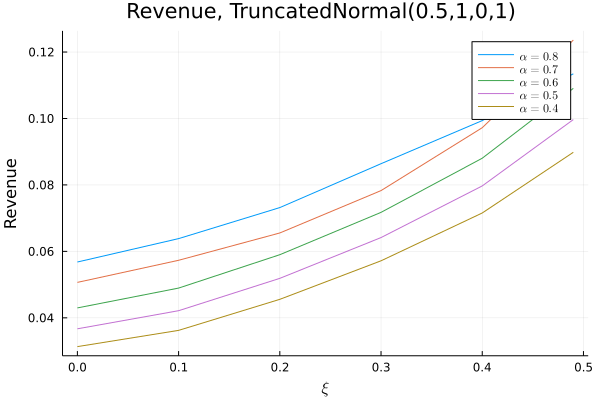

In [34]:
p1 = plot(xil, maxrev1, label = L"\alpha=0.8")
p2 = plot(p1, xil, maxrev2, label = L"\alpha=0.7")
p3 = plot(p2, xil, maxrev3, label = L"\alpha=0.6")
p4 = plot(p3, xil, maxrev4, label = L"\alpha=0.5")
p3 = plot(p4, xil, maxrev5, title = "Revenue, TruncatedNormal(0.5,1,0,1) ", label = L"\alpha=0.4", xlab = L"\xi" , ylab = "Revenue")


Here I have limited the threshold to be smaller than the revenue maximizing price, as in lemma 4. Note that in general higher alpha means higher revenue across all xis, but the trend seems to fail at the tail end for alpha = 0.8 and alpha = 0.7